<a href="https://colab.research.google.com/github/Kajal1708/LSTM-Model/blob/main/LSTM_Model_using_collosal_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check GPU status
!nvidia-smi

# Install specific PyTorch version compatible with Colossal-AI
!pip install torch==2.4.1

# Install Colossal-AI
!pip install colossalai==0.4.6


Fri Nov  8 16:47:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Install necessary libraries using %pip to avoid session restart
%pip install transformers datasets

# Import required libraries
from datasets import load_dataset
from transformers import BertTokenizer

# Load IMDB dataset
dataset = load_dataset("imdb")

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=256)

# Apply tokenization
train_data = dataset['train'].map(tokenize, batched=True)
test_data = dataset['test'].map(tokenize, batched=True)

# Format data for PyTorch
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Display a sample
print("Sample tokenized data:", train_data[0])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.3 which is incompatible.
torchaudio 2.5.0+cu121 requires torch=

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Sample tokenized data: {'label': tensor(0), 'input_ids': tensor([  101,  1045, 12524,  1045,  2572,  8025,  1011,  3756,  2013,  2026,
         2678,  3573,  2138,  1997,  2035,  1996,  6704,  2008,  5129,  2009,
         2043,  2009,  2001,  2034,  2207,  1999,  3476,  1012,  1045,  2036,
         2657,  2008,  2012,  2034,  2009,  2001,  8243,  2011,  1057,  1012,
         1055,  1012,  8205,  2065,  2009,  2412,  2699,  2000,  4607,  2023,
         2406,  1010,  3568,  2108,  1037,  5470,  1997,  3152,  2641,  1000,
         6801,  1000,  1045,  2428,  2018,  2000,  2156,  2023,  2005,  2870,
         1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028,  1996,
         5436,  2003,  8857,  2105,  1037,  2402,  4467,  3689,  3076,  2315,
        14229,  2040,  4122,  2000,  4553,  2673,  2016,  2064,  2055,  2166,
         1012,  1999,  3327,  2016,  4122,  2000,  3579,  2014,  3086,  2015,
         2000,  2437,  2070,  4066,  1997,  4516,  2006,  2054,  1996,  2779,
       

Epoch 1/30
Training Loss: 0.6919
Test Loss: 0.6767
Test Accuracy: 0.5548
Time Taken: 59.96 seconds

Epoch 2/30
Training Loss: 0.4659
Test Loss: 0.4078
Test Accuracy: 0.8279
Time Taken: 59.19 seconds

Epoch 3/30
Training Loss: 0.2957
Test Loss: 0.3764
Test Accuracy: 0.8418
Time Taken: 54.97 seconds

Epoch 4/30
Training Loss: 0.2053
Test Loss: 0.4240
Test Accuracy: 0.8382
Time Taken: 57.34 seconds

Epoch 5/30
Training Loss: 0.1361
Test Loss: 0.4872
Test Accuracy: 0.8337
Time Taken: 54.93 seconds

Epoch 6/30
Training Loss: 0.0906
Test Loss: 0.5629
Test Accuracy: 0.8362
Time Taken: 55.15 seconds

Epoch 7/30
Training Loss: 0.0640
Test Loss: 0.6549
Test Accuracy: 0.8281
Time Taken: 55.17 seconds

Epoch 8/30
Training Loss: 0.0477
Test Loss: 0.7484
Test Accuracy: 0.8262
Time Taken: 54.79 seconds

Epoch 9/30
Training Loss: 0.0363
Test Loss: 0.7790
Test Accuracy: 0.8252
Time Taken: 55.06 seconds

Epoch 10/30
Training Loss: 0.0338
Test Loss: 0.8006
Test Accuracy: 0.8248
Time Taken: 54.90 seconds


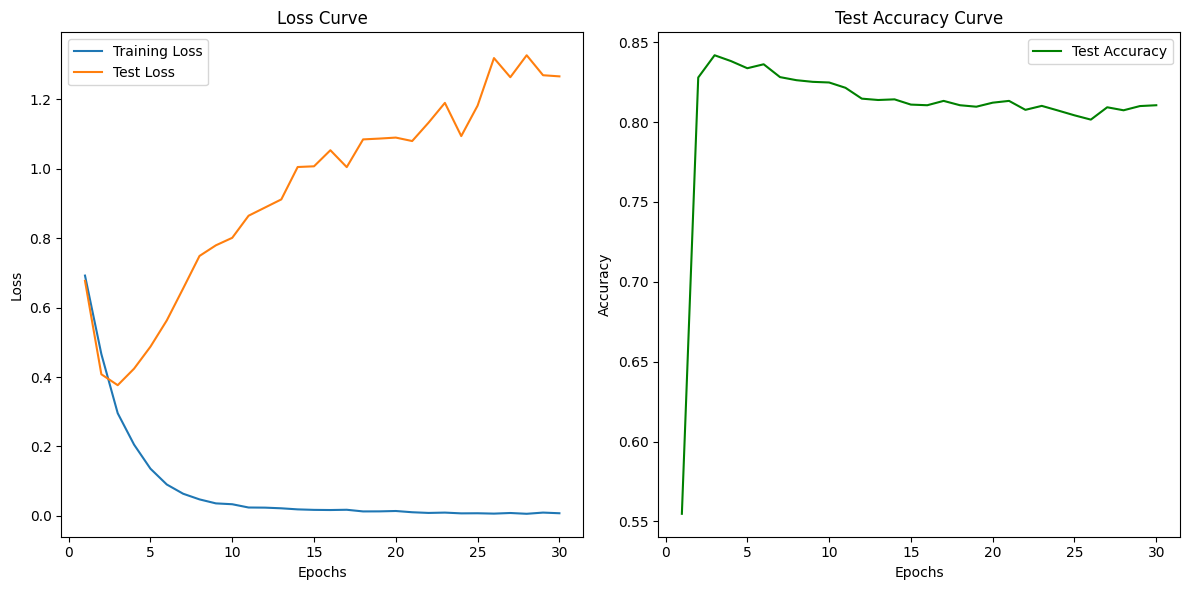


Final Metrics:
Final Test Accuracy: 0.8105
Final Precision: 0.8105
Final Recall: 0.8105
Final F1 Score: 0.8105


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM-based sequence classification model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, num_classes=2, num_layers=1, bidirectional=True):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        output = lstm_out[:, -1, :]
        return self.fc(output)

# Initialize model
vocab_size = tokenizer.vocab_size
model = LSTMClassifier(vocab_size=vocab_size).to(device)

# Hyperparameters
learning_rate = 1e-3
batch_size = 4
epochs = 30

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training function
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds =[]
    all_labels =[]
    with torch.no_grad():
        for batch in loader:
            input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

# Training loop
import time
train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []
# Training loop with metrics tracking
for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_accuracy, precision, recall, f1 = evaluate(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)

    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")


# Final metrics after training
average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")


Epoch 1/30
Training Loss: 0.6952
Test Loss: 0.6931
Test Accuracy: 0.5111
Time Taken: 30.12 seconds

Epoch 2/30
Training Loss: 0.6426
Test Loss: 0.5232
Test Accuracy: 0.7599
Time Taken: 29.84 seconds

Epoch 3/30
Training Loss: 0.4161
Test Loss: 0.4160
Test Accuracy: 0.8221
Time Taken: 30.40 seconds

Epoch 4/30
Training Loss: 0.2911
Test Loss: 0.3884
Test Accuracy: 0.8369
Time Taken: 30.18 seconds

Epoch 5/30
Training Loss: 0.2118
Test Loss: 0.4801
Test Accuracy: 0.8146
Time Taken: 29.97 seconds

Epoch 6/30
Training Loss: 0.1480
Test Loss: 0.4946
Test Accuracy: 0.8361
Time Taken: 30.36 seconds

Epoch 7/30
Training Loss: 0.1023
Test Loss: 0.5543
Test Accuracy: 0.8339
Time Taken: 30.07 seconds

Epoch 8/30
Training Loss: 0.0711
Test Loss: 0.5713
Test Accuracy: 0.8312
Time Taken: 29.87 seconds

Epoch 9/30
Training Loss: 0.0506
Test Loss: 0.6424
Test Accuracy: 0.8304
Time Taken: 30.30 seconds

Epoch 10/30
Training Loss: 0.0398
Test Loss: 0.6968
Test Accuracy: 0.8228
Time Taken: 30.11 seconds


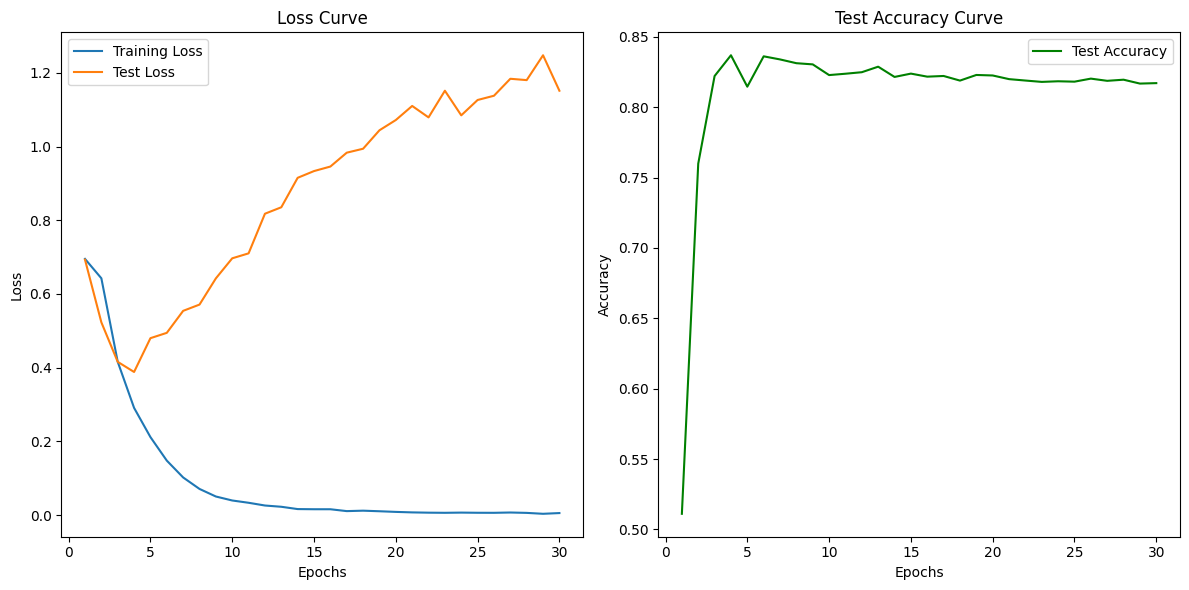


Final Metrics:
Final Test Accuracy: 0.8171
Final Precision: 0.8173
Final Recall: 0.8171
Final F1 Score: 0.8170


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM-based sequence classification model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, num_classes=2, num_layers=1, bidirectional=True):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        output = lstm_out[:, -1, :]
        return self.fc(output)

# Initialize model
vocab_size = tokenizer.vocab_size
model = LSTMClassifier(vocab_size=vocab_size).to(device)

# Hyperparameters
learning_rate = 1e-3
batch_size = 8
epochs = 30

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training function
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds =[]
    all_labels =[]
    with torch.no_grad():
        for batch in loader:
            input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

# Training loop
import time
train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []
# Training loop with metrics tracking
for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_accuracy, precision, recall, f1 = evaluate(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)

    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")


# Final metrics after training
average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")


Epoch 1/30
Training Loss: 0.6916
Test Loss: 0.6868
Test Accuracy: 0.5286
Time Taken: 17.10 seconds

Epoch 2/30
Training Loss: 0.6753
Test Loss: 0.6910
Test Accuracy: 0.5287
Time Taken: 17.30 seconds

Epoch 3/30
Training Loss: 0.6084
Test Loss: 0.5083
Test Accuracy: 0.7731
Time Taken: 17.51 seconds

Epoch 4/30
Training Loss: 0.3971
Test Loss: 0.4192
Test Accuracy: 0.8114
Time Taken: 19.40 seconds

Epoch 5/30
Training Loss: 0.2815
Test Loss: 0.3996
Test Accuracy: 0.8304
Time Taken: 19.48 seconds

Epoch 6/30
Training Loss: 0.2062
Test Loss: 0.4046
Test Accuracy: 0.8417
Time Taken: 17.10 seconds

Epoch 7/30
Training Loss: 0.1428
Test Loss: 0.4706
Test Accuracy: 0.8338
Time Taken: 17.18 seconds

Epoch 8/30
Training Loss: 0.0924
Test Loss: 0.5586
Test Accuracy: 0.8320
Time Taken: 19.90 seconds

Epoch 9/30
Training Loss: 0.0604
Test Loss: 0.6159
Test Accuracy: 0.8367
Time Taken: 20.53 seconds

Epoch 10/30
Training Loss: 0.0457
Test Loss: 0.7067
Test Accuracy: 0.8322
Time Taken: 22.16 seconds


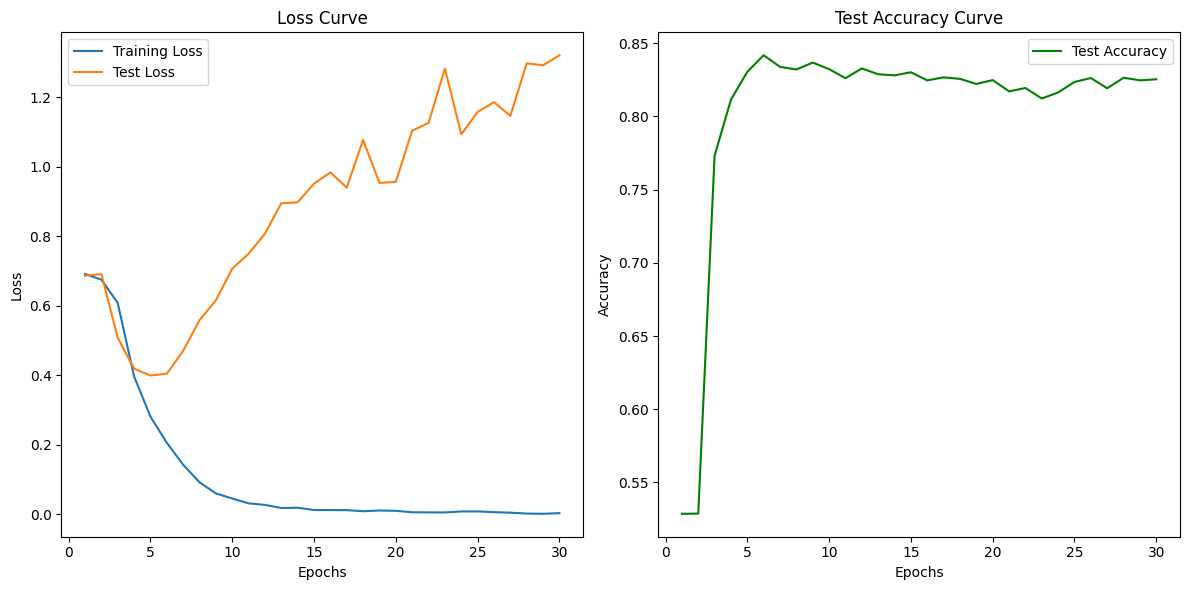


Final Metrics:
Final Test Accuracy: 0.8253
Final Precision: 0.8256
Final Recall: 0.8253
Final F1 Score: 0.8253


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM-based sequence classification model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, num_classes=2, num_layers=1, bidirectional=True):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        output = lstm_out[:, -1, :]
        return self.fc(output)

# Initialize model
vocab_size = tokenizer.vocab_size
model = LSTMClassifier(vocab_size=vocab_size).to(device)

# Hyperparameters
learning_rate = 1e-3
batch_size = 16
epochs = 30

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training function
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds =[]
    all_labels =[]
    with torch.no_grad():
        for batch in loader:
            input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

# Training loop
import time
train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []
# Training loop with metrics tracking
for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_accuracy, precision, recall, f1 = evaluate(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)

    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")


# Final metrics after training
average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")


Epoch 1/30
Training Loss: 0.6924
Test Loss: 0.7104
Test Accuracy: 0.5241
Time Taken: 11.18 seconds

Epoch 2/30
Training Loss: 0.6704
Test Loss: 0.6733
Test Accuracy: 0.5573
Time Taken: 12.18 seconds

Epoch 3/30
Training Loss: 0.5711
Test Loss: 0.6032
Test Accuracy: 0.7074
Time Taken: 13.35 seconds

Epoch 4/30
Training Loss: 0.5008
Test Loss: 0.4913
Test Accuracy: 0.7893
Time Taken: 11.23 seconds

Epoch 5/30
Training Loss: 0.3628
Test Loss: 0.4205
Test Accuracy: 0.8120
Time Taken: 11.34 seconds

Epoch 6/30
Training Loss: 0.2488
Test Loss: 0.4185
Test Accuracy: 0.8233
Time Taken: 11.49 seconds

Epoch 7/30
Training Loss: 0.1790
Test Loss: 0.4609
Test Accuracy: 0.8326
Time Taken: 11.54 seconds

Epoch 8/30
Training Loss: 0.1229
Test Loss: 0.4882
Test Accuracy: 0.8337
Time Taken: 11.14 seconds

Epoch 9/30
Training Loss: 0.0797
Test Loss: 0.6177
Test Accuracy: 0.8304
Time Taken: 11.04 seconds

Epoch 10/30
Training Loss: 0.0580
Test Loss: 0.6395
Test Accuracy: 0.8247
Time Taken: 11.50 seconds


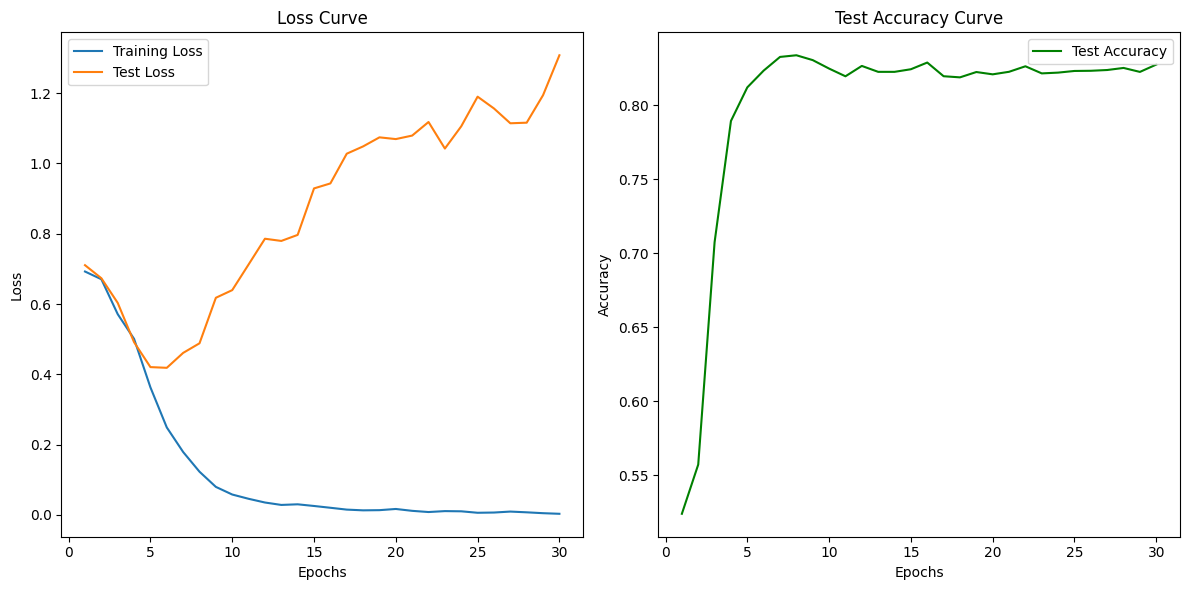


Final Metrics:
Final Test Accuracy: 0.8274
Final Precision: 0.8274
Final Recall: 0.8274
Final F1 Score: 0.8274


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM-based sequence classification model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, num_classes=2, num_layers=1, bidirectional=True):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        output = lstm_out[:, -1, :]
        return self.fc(output)

# Initialize model
vocab_size = tokenizer.vocab_size
model = LSTMClassifier(vocab_size=vocab_size).to(device)

# Hyperparameters
learning_rate = 1e-3
batch_size = 32
epochs = 30

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training function
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds =[]
    all_labels =[]
    with torch.no_grad():
        for batch in loader:
            input_ids, labels = batch['input_ids'].to(device), batch['label'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

# Training loop
import time
train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []
# Training loop with metrics tracking
for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_accuracy, precision, recall, f1 = evaluate(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)

    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")


# Final metrics after training
average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")


In [ ]:
import colossalai
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from colossalai.booster import Booster
from colossalai.booster.plugin import HybridParallelPlugin
from colossalai.nn.optimizer import HybridAdam
from torch.nn import Module
from colossalai.utils import get_current_device
from torch.cuda.amp import autocast, GradScaler
import time
from colossalai.cluster import DistCoordinator
from functools import partial

import os

# Set environment variables for distributed training
os.environ['RANK'] = '0'
os.environ['LOCAL_RANK'] = '0'
os.environ['WORLD_SIZE'] = '1'  # Since we're using a single machine
os.environ['MASTER_ADDR'] = 'localhost'  # This is the master node address
os.environ['MASTER_PORT'] = '29500'  # This is the port to be used for communication

# Proceed with initializing Colossal-AI
# import colossalai
colossalai.launch_from_torch(backend='nccl', seed=42, verbose=True)

/usr/local/lib/python3.10/dist-packages/colossalai/shardformer/layer/normalization.py:45: UserWarning: Please install apex from source (https://github.com/NVIDIA/apex) to use the fused RMSNorm kernel
  warnings.warn("Please install apex from source (https://github.com/NVIDIA/apex) to use the fused RMSNorm kernel")


[11/08/24 17:27:14] INFO     colossalai - colossalai - INFO:                                                       
                             /usr/local/lib/python3.10/dist-packages/colossalai/initialize.py:75 launch

                    INFO     colossalai - colossalai - INFO: Distributed environment is initialized, world size: 1

In [ ]:
# Define the LSTM Classifier
class LSTMClassifier(Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, num_classes=2, num_layers=1, bidirectional=True):
        super(LSTMClassifier, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        output = lstm_out[:, -1, :]
        return self.fc(output)

# Define the model, optimizer, and other components
device = get_current_device()
vocab_size = vocab_size  # Adjust this as per your tokenizer vocab size
model = LSTMClassifier(vocab_size=vocab_size).to(device)

# Set up HybridParallelPlugin for Data Parallelism and Mixed Precision
plugin = HybridParallelPlugin(
    tp_size=1,  # No tensor parallelism
    pp_size=1,  # Use single pipeline stage (disable pipeline parallelism)
    num_microbatches=None,
    microbatch_size=1,
    enable_all_optimization=True,
    zero_stage=1,  # ZeRO Stage 1 optimization
    precision="fp16",  # Use mixed precision
    initial_scale=1,
)


# Prepare optimizer and mixed precision scaler
optimizer = HybridAdam(model.parameters(), lr=1e-3)
scaler = GradScaler()

# Set up the Booster with HybridParallelPlugin
booster = Booster(plugin=plugin)




[extension] Compiling the JIT cpu_adam_x86 kernel during runtime now


/usr/local/lib/python3.10/dist-packages/colossalai/shardformer/shard/shard_config.py:117: UserWarning: You set enable_all_optimization=True, but apex is not installed.
  warnings.warn("You set enable_all_optimization=True, but apex is not installed.")
/usr/local/lib/python3.10/dist-packages/colossalai/kernel/extensions/utils.py:96: UserWarning: [extension] The CUDA version on the system (12.2) does not match with the version (12.1) torch was compiled with. The mismatch is found in the minor version. As the APIs are compatible, we will allow compilation to proceed. If you encounter any issue when using the built kernel, please try to build it again with fully matched CUDA versions
  warnings.warn(


[extension] Time taken to compile cpu_adam_x86 op: 39.04564929008484 seconds
[extension] Compiling the JIT fused_optim_cuda kernel during runtime now


/usr/local/lib/python3.10/dist-packages/colossalai/kernel/extensions/utils.py:96: UserWarning: [extension] The CUDA version on the system (12.2) does not match with the version (12.1) torch was compiled with. The mismatch is found in the minor version. As the APIs are compatible, we will allow compilation to proceed. If you encounter any issue when using the built kernel, please try to build it again with fully matched CUDA versions
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[extension] Time taken to compile fused_optim_cuda op: 249.70314645767212 seconds


<ipython-input-5-c8b2104037c7>:35: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [ ]:
# Check a few labels from your dataset to ensure they are either 0 or 1
print(train_data['label'][:10])  # Look at the first 10 labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
# Check the shape of the input
print(vocab_size)

30522


In [ ]:
%set_env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


env: CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.10/dist-packages/colossalai/nn/optimizer/nvme_optimizer.py:55: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  numel += p.storage().size()


Epoch 1/30
Training Loss: 0.6917
Test Loss: 0.6917
Test Accuracy: 0.5128
Precision: 0.5152
Recall: 0.5128
F1 Score: 0.4926
Time Taken: 35.84 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2/30
Training Loss: 0.5717
Test Loss: 0.4541
Test Accuracy: 0.8038
Precision: 0.8038
Recall: 0.8038
F1 Score: 0.8038
Time Taken: 34.76 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 3/30
Training Loss: 0.3392
Test Loss: 0.3694
Test Accuracy: 0.8441
Precision: 0.8442
Recall: 0.8441
F1 Score: 0.8441
Time Taken: 35.65 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 4/30
Training Loss: 0.2238
Test Loss: 0.4049
Test Accuracy: 0.8457
Precision: 0.8457
Recall: 0.8457
F1 Score: 0.8457
Time Taken: 36.45 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 5/30
Training Loss: 0.1428
Test Loss: 0.4574
Test Accuracy: 0.8430
Precision: 0.8434
Recall: 0.8430
F1 Score: 0.8430
Time Taken: 40.73 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 6/30
Training Loss: 0.0876
Test Loss: 0.5673
Test Accuracy: 0.8251
Precision: 0.8317
Recall: 0.8251
F1 Score: 0.8242
Time Taken: 37.01 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 7/30
Training Loss: 0.0557
Test Loss: 0.5821
Test Accuracy: 0.8336
Precision: 0.8336
Recall: 0.8336
F1 Score: 0.8336
Time Taken: 37.42 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 8/30
Training Loss: 0.0375
Test Loss: 0.7562
Test Accuracy: 0.8301
Precision: 0.8303
Recall: 0.8301
F1 Score: 0.8301
Time Taken: 38.59 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 9/30
Training Loss: 0.0285
Test Loss: 0.7963
Test Accuracy: 0.8284
Precision: 0.8288
Recall: 0.8284
F1 Score: 0.8284
Time Taken: 36.98 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 10/30
Training Loss: 0.0250
Test Loss: 0.7860
Test Accuracy: 0.8312
Precision: 0.8313
Recall: 0.8312
F1 Score: 0.8312
Time Taken: 38.71 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 11/30
Training Loss: 0.0204
Test Loss: 0.8251
Test Accuracy: 0.8247
Precision: 0.8253
Recall: 0.8247
F1 Score: 0.8246
Time Taken: 38.84 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 12/30
Training Loss: 0.0159
Test Loss: 0.9288
Test Accuracy: 0.8265
Precision: 0.8277
Recall: 0.8265
F1 Score: 0.8263
Time Taken: 41.03 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 13/30
Training Loss: 0.0137
Test Loss: 0.9554
Test Accuracy: 0.8302
Precision: 0.8304
Recall: 0.8302
F1 Score: 0.8302
Time Taken: 35.80 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 14/30
Training Loss: 0.0149
Test Loss: 0.9827
Test Accuracy: 0.8181
Precision: 0.8221
Recall: 0.8181
F1 Score: 0.8175
Time Taken: 39.58 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 15/30
Training Loss: 0.0127
Test Loss: 0.9878
Test Accuracy: 0.8240
Precision: 0.8247
Recall: 0.8240
F1 Score: 0.8239
Time Taken: 37.88 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 16/30
Training Loss: 0.0126
Test Loss: 0.9361
Test Accuracy: 0.8273
Precision: 0.8274
Recall: 0.8273
F1 Score: 0.8273
Time Taken: 33.13 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 17/30
Training Loss: 0.0116
Test Loss: 1.0237
Test Accuracy: 0.8300
Precision: 0.8300
Recall: 0.8300
F1 Score: 0.8300
Time Taken: 31.23 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 18/30
Training Loss: 0.0050
Test Loss: 1.1220
Test Accuracy: 0.8252
Precision: 0.8262
Recall: 0.8252
F1 Score: 0.8251
Time Taken: 31.08 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 19/30
Training Loss: 0.0128
Test Loss: 0.9702
Test Accuracy: 0.8254
Precision: 0.8257
Recall: 0.8254
F1 Score: 0.8254
Time Taken: 30.90 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 20/30
Training Loss: 0.0072
Test Loss: 1.1486
Test Accuracy: 0.8248
Precision: 0.8265
Recall: 0.8248
F1 Score: 0.8246
Time Taken: 31.40 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 21/30
Training Loss: 0.0068
Test Loss: 1.0418
Test Accuracy: 0.8220
Precision: 0.8220
Recall: 0.8220
F1 Score: 0.8220
Time Taken: 30.84 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 22/30
Training Loss: 0.0049
Test Loss: 1.1960
Test Accuracy: 0.8234
Precision: 0.8250
Recall: 0.8234
F1 Score: 0.8232
Time Taken: 31.36 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 23/30
Training Loss: 0.0051
Test Loss: 1.2550
Test Accuracy: 0.8220
Precision: 0.8264
Recall: 0.8220
F1 Score: 0.8215
Time Taken: 30.92 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 24/30
Training Loss: 0.0056
Test Loss: 1.2104
Test Accuracy: 0.8130
Precision: 0.8171
Recall: 0.8130
F1 Score: 0.8124
Time Taken: 30.91 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 25/30
Training Loss: 0.0072
Test Loss: 1.1013
Test Accuracy: 0.8206
Precision: 0.8208
Recall: 0.8206
F1 Score: 0.8206
Time Taken: 31.55 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 26/30
Training Loss: 0.0056
Test Loss: 1.0815
Test Accuracy: 0.8206
Precision: 0.8208
Recall: 0.8206
F1 Score: 0.8205
Time Taken: 30.89 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 27/30
Training Loss: 0.0029
Test Loss: 1.3215
Test Accuracy: 0.8252
Precision: 0.8262
Recall: 0.8252
F1 Score: 0.8251
Time Taken: 31.47 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 28/30
Training Loss: 0.0024
Test Loss: 1.2554
Test Accuracy: 0.8228
Precision: 0.8228
Recall: 0.8228
F1 Score: 0.8228
Time Taken: 30.82 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 29/30
Training Loss: 0.0049
Test Loss: 1.1600
Test Accuracy: 0.8185
Precision: 0.8201
Recall: 0.8185
F1 Score: 0.8183
Time Taken: 30.95 seconds



<ipython-input-9-f9ca2b494927>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 30/30
Training Loss: 0.0038
Test Loss: 1.2449
Test Accuracy: 0.8262
Precision: 0.8262
Recall: 0.8262
F1 Score: 0.8262
Time Taken: 31.29 seconds

Average time per epoch: 34.47 seconds


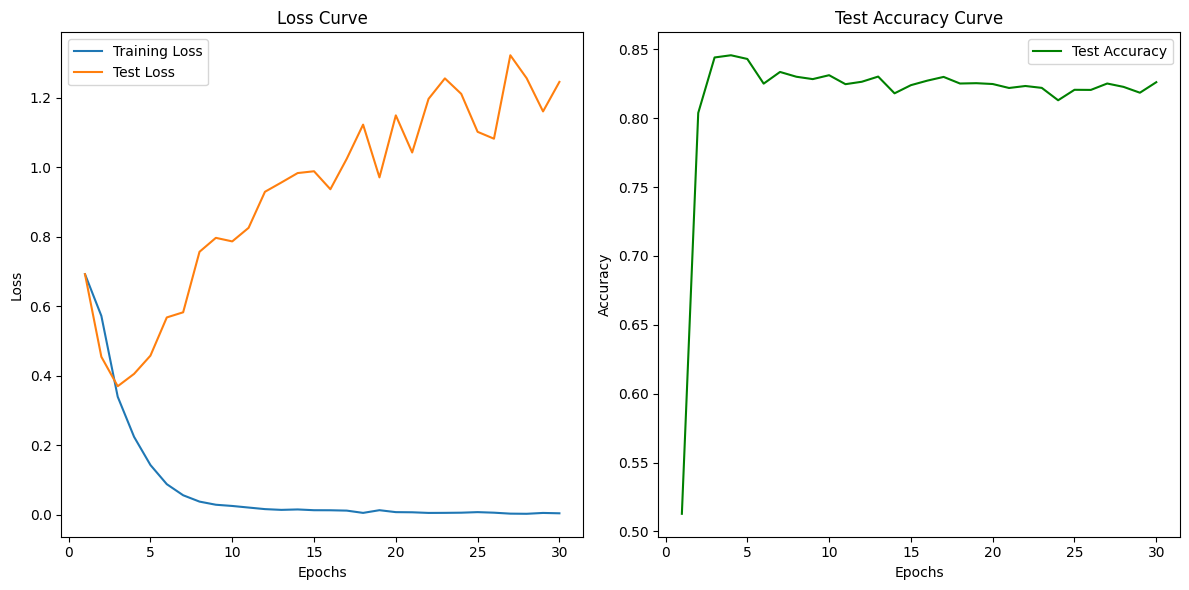


Final Metrics:
Final Test Accuracy: 0.8262
Final Precision: 0.8262
Final Recall: 0.8262
Final F1 Score: 0.8262


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%set_env CUDA_LAUNCH_BLOCKING=1
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Training loop for parallel model with mixed precision
# epochs = 10  # Example value
learning_rate = 1e-3
batch_size = 8
epochs = 30
criterion = nn.CrossEntropyLoss()
scaler = torch.amp.GradScaler('cuda')

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

def train_parallel(model, loader, optimizer, criterion, scaler):
    model.train()
    total_loss = 0
    for batch in loader:
        batch['input_ids'] = torch.clamp(batch['input_ids'], 0, vocab_size - 1)
        batch['label'] = batch['label'].long()
        labels = batch['label'].to(device, dtype=torch.long)
        input_ids = batch['input_ids'].to(device)
        optimizer.zero_grad()
        with autocast():
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    return total_loss / len(loader)
def evaluate_parallel(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in loader:
            batch['input_ids'] = torch.clamp(batch['input_ids'], 0, vocab_size - 1)
            batch['label'] = batch['label'].long()
            labels = batch['label'].to(device, dtype=torch.long)
            input_ids = batch['input_ids'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []

for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train_parallel(model, train_loader, optimizer, criterion, scaler)
    test_loss, test_accuracy, precision, recall, f1 = evaluate_parallel(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)
    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")

average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")

env: CUDA_LAUNCH_BLOCKING=1


<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/30
Training Loss: 0.0016
Test Loss: 1.2632
Test Accuracy: 0.8252
Precision: 0.8253
Recall: 0.8252
F1 Score: 0.8252
Time Taken: 17.60 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2/30
Training Loss: 0.0013
Test Loss: 1.3447
Test Accuracy: 0.8246
Precision: 0.8250
Recall: 0.8246
F1 Score: 0.8246
Time Taken: 16.77 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 3/30
Training Loss: 0.0003
Test Loss: 1.4415
Test Accuracy: 0.8251
Precision: 0.8258
Recall: 0.8251
F1 Score: 0.8250
Time Taken: 16.80 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 4/30
Training Loss: 0.0001
Test Loss: 1.5740
Test Accuracy: 0.8255
Precision: 0.8257
Recall: 0.8255
F1 Score: 0.8255
Time Taken: 17.22 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 5/30
Training Loss: 0.0000
Test Loss: 1.6383
Test Accuracy: 0.8240
Precision: 0.8252
Recall: 0.8240
F1 Score: 0.8238
Time Taken: 16.94 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 6/30
Training Loss: 0.0000
Test Loss: 1.7883
Test Accuracy: 0.8244
Precision: 0.8254
Recall: 0.8244
F1 Score: 0.8243
Time Taken: 16.80 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 7/30
Training Loss: 0.0000
Test Loss: 1.8995
Test Accuracy: 0.8249
Precision: 0.8259
Recall: 0.8249
F1 Score: 0.8247
Time Taken: 16.94 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 8/30
Training Loss: 0.0000
Test Loss: 1.9943
Test Accuracy: 0.8249
Precision: 0.8263
Recall: 0.8249
F1 Score: 0.8247
Time Taken: 17.14 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 9/30
Training Loss: 0.0000
Test Loss: 2.1429
Test Accuracy: 0.8249
Precision: 0.8262
Recall: 0.8249
F1 Score: 0.8247
Time Taken: 16.79 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 10/30
Training Loss: 0.0000
Test Loss: 2.2703
Test Accuracy: 0.8254
Precision: 0.8266
Recall: 0.8254
F1 Score: 0.8253
Time Taken: 16.80 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 11/30
Training Loss: 0.0000
Test Loss: 2.4281
Test Accuracy: 0.8258
Precision: 0.8272
Recall: 0.8258
F1 Score: 0.8256
Time Taken: 17.28 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 12/30
Training Loss: 0.0000
Test Loss: 2.5295
Test Accuracy: 0.8259
Precision: 0.8271
Recall: 0.8259
F1 Score: 0.8258
Time Taken: 16.81 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 13/30
Training Loss: 0.0000
Test Loss: 2.6601
Test Accuracy: 0.8258
Precision: 0.8272
Recall: 0.8258
F1 Score: 0.8257
Time Taken: 19.48 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 14/30
Training Loss: 0.0000
Test Loss: 2.7775
Test Accuracy: 0.8263
Precision: 0.8277
Recall: 0.8263
F1 Score: 0.8261
Time Taken: 23.35 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 15/30
Training Loss: 0.0000
Test Loss: 2.8853
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 17.08 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 16/30
Training Loss: 0.0000
Test Loss: 3.0197
Test Accuracy: 0.8270
Precision: 0.8282
Recall: 0.8270
F1 Score: 0.8268
Time Taken: 17.06 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 17/30
Training Loss: 0.0000
Test Loss: 3.1193
Test Accuracy: 0.8270
Precision: 0.8282
Recall: 0.8270
F1 Score: 0.8268
Time Taken: 16.82 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 18/30
Training Loss: 0.0000
Test Loss: 3.2088
Test Accuracy: 0.8269
Precision: 0.8282
Recall: 0.8269
F1 Score: 0.8268
Time Taken: 16.89 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 19/30
Training Loss: 0.0000
Test Loss: 3.2732
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 17.19 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 20/30
Training Loss: 0.0000
Test Loss: 3.3297
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 16.79 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 21/30
Training Loss: 0.0000
Test Loss: 3.3727
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 16.79 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 22/30
Training Loss: 0.0000
Test Loss: 3.4064
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 17.35 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 23/30
Training Loss: 0.0000
Test Loss: 3.4383
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 16.84 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 24/30
Training Loss: 0.0000
Test Loss: 3.4630
Test Accuracy: 0.8266
Precision: 0.8279
Recall: 0.8266
F1 Score: 0.8264
Time Taken: 16.82 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 25/30
Training Loss: 0.0000
Test Loss: 3.4861
Test Accuracy: 0.8266
Precision: 0.8279
Recall: 0.8266
F1 Score: 0.8265
Time Taken: 17.27 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 26/30
Training Loss: 0.0000
Test Loss: 3.5069
Test Accuracy: 0.8267
Precision: 0.8280
Recall: 0.8267
F1 Score: 0.8266
Time Taken: 16.77 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 27/30
Training Loss: 0.0000
Test Loss: 3.5250
Test Accuracy: 0.8267
Precision: 0.8280
Recall: 0.8267
F1 Score: 0.8266
Time Taken: 16.69 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 28/30
Training Loss: 0.0000
Test Loss: 3.5409
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 17.18 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 29/30
Training Loss: 0.0000
Test Loss: 3.5556
Test Accuracy: 0.8267
Precision: 0.8280
Recall: 0.8267
F1 Score: 0.8266
Time Taken: 16.83 seconds



<ipython-input-10-dc2c910132a8>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 30/30
Training Loss: 0.0000
Test Loss: 3.5697
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 16.81 seconds

Average time per epoch: 17.26 seconds


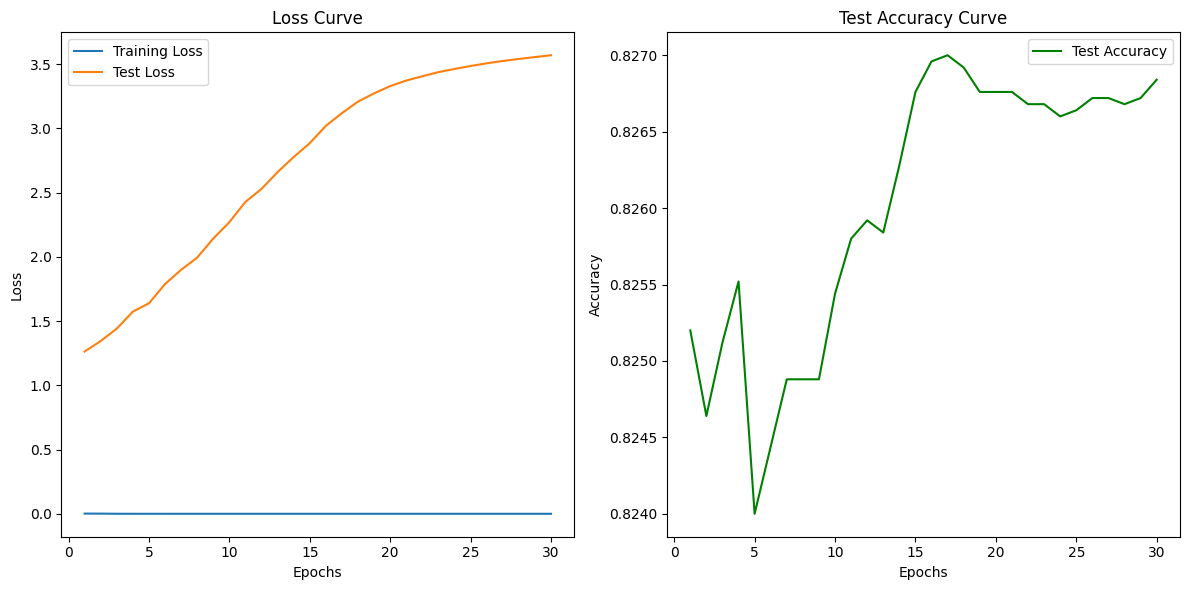


Final Metrics:
Final Test Accuracy: 0.8268
Final Precision: 0.8281
Final Recall: 0.8268
Final F1 Score: 0.8267


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%set_env CUDA_LAUNCH_BLOCKING=1
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
learning_rate = 1e-3
batch_size = 16
epochs = 30
criterion = nn.CrossEntropyLoss()
scaler = torch.amp.GradScaler('cuda')

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

def train_parallel(model, loader, optimizer, criterion, scaler):
    model.train()
    total_loss = 0
    for batch in loader:
        batch['input_ids'] = torch.clamp(batch['input_ids'], 0, vocab_size - 1)
        batch['label'] = batch['label'].long()
        labels = batch['label'].to(device, dtype=torch.long)
        input_ids = batch['input_ids'].to(device)

        optimizer.zero_grad()

        with autocast():
            outputs = model(input_ids)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    return total_loss / len(loader)
def evaluate_parallel(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in loader:
            batch['input_ids'] = torch.clamp(batch['input_ids'], 0, vocab_size - 1)
            batch['label'] = batch['label'].long()
            labels = batch['label'].to(device, dtype=torch.long)
            input_ids = batch['input_ids'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []

for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train_parallel(model, train_loader, optimizer, criterion, scaler)
    test_loss, test_accuracy, precision, recall, f1 = evaluate_parallel(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)
    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")

# Final metrics after training
average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")

env: CUDA_LAUNCH_BLOCKING=1


<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/30
Training Loss: 0.0000
Test Loss: 3.5767
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 12.69 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2/30
Training Loss: 0.0000
Test Loss: 3.5827
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.14 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 3/30
Training Loss: 0.0000
Test Loss: 3.5883
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 10.12 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 4/30
Training Loss: 0.0000
Test Loss: 3.5941
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.13 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 5/30
Training Loss: 0.0000
Test Loss: 3.5996
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 9.71 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 6/30
Training Loss: 0.0000
Test Loss: 3.6052
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.05 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 7/30
Training Loss: 0.0000
Test Loss: 3.6106
Test Accuracy: 0.8267
Precision: 0.8280
Recall: 0.8267
F1 Score: 0.8266
Time Taken: 10.19 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 8/30
Training Loss: 0.0000
Test Loss: 3.6155
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.16 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 9/30
Training Loss: 0.0000
Test Loss: 3.6203
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 9.93 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 10/30
Training Loss: 0.0000
Test Loss: 3.6249
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 9.80 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 11/30
Training Loss: 0.0000
Test Loss: 3.6293
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.15 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 12/30
Training Loss: 0.0000
Test Loss: 3.6337
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.11 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 13/30
Training Loss: 0.0000
Test Loss: 3.6378
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 13.05 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 14/30
Training Loss: 0.0000
Test Loss: 3.6423
Test Accuracy: 0.8269
Precision: 0.8281
Recall: 0.8269
F1 Score: 0.8267
Time Taken: 11.64 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 15/30
Training Loss: 0.0000
Test Loss: 3.6461
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 9.80 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 16/30
Training Loss: 0.0000
Test Loss: 3.6501
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 10.03 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 17/30
Training Loss: 0.0000
Test Loss: 3.6542
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 10.09 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 18/30
Training Loss: 0.0000
Test Loss: 3.6580
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 10.16 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 19/30
Training Loss: 0.0000
Test Loss: 3.6618
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 9.97 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 20/30
Training Loss: 0.0000
Test Loss: 3.6653
Test Accuracy: 0.8268
Precision: 0.8281
Recall: 0.8268
F1 Score: 0.8267
Time Taken: 9.67 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 21/30
Training Loss: 0.0000
Test Loss: 3.6690
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.14 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 22/30
Training Loss: 0.0000
Test Loss: 3.6726
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.09 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 23/30
Training Loss: 0.0000
Test Loss: 3.6760
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.03 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 24/30
Training Loss: 0.0000
Test Loss: 3.6794
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 9.73 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 25/30
Training Loss: 0.0000
Test Loss: 3.6828
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 9.98 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 26/30
Training Loss: 0.0000
Test Loss: 3.6861
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 10.12 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 27/30
Training Loss: 0.0000
Test Loss: 3.6892
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 10.09 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 28/30
Training Loss: 0.0000
Test Loss: 3.6924
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 10.01 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 29/30
Training Loss: 0.0000
Test Loss: 3.6955
Test Accuracy: 0.8267
Precision: 0.8279
Recall: 0.8267
F1 Score: 0.8265
Time Taken: 9.63 seconds



<ipython-input-11-e81fe942e17c>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 30/30
Training Loss: 0.0000
Test Loss: 3.6986
Test Accuracy: 0.8268
Precision: 0.8280
Recall: 0.8268
F1 Score: 0.8266
Time Taken: 10.19 seconds

Average time per epoch: 10.25 seconds


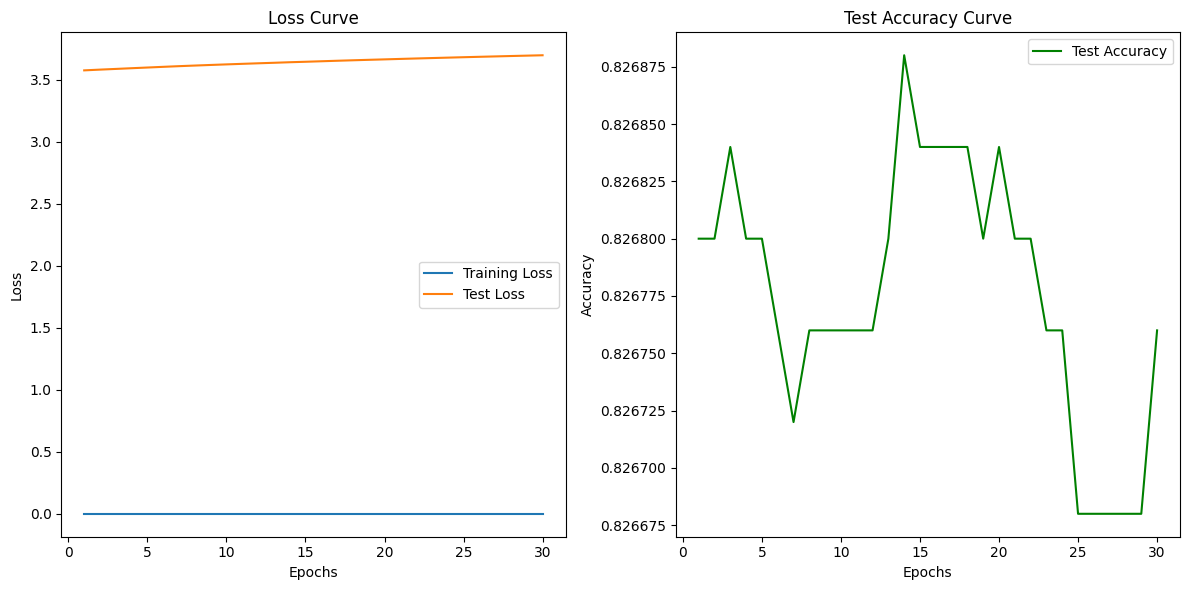


Final Metrics:
Final Test Accuracy: 0.8268
Final Precision: 0.8280
Final Recall: 0.8268
Final F1 Score: 0.8266


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%set_env CUDA_LAUNCH_BLOCKING=1
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Training loop for parallel model with mixed precision
# epochs = 10  # Example value
learning_rate = 1e-3
batch_size = 32
epochs = 30
criterion = nn.CrossEntropyLoss()
scaler = torch.amp.GradScaler('cuda')

# Data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

def train_parallel(model, loader, optimizer, criterion, scaler):
    model.train()
    total_loss = 0
    for batch in loader:
        batch['input_ids'] = torch.clamp(batch['input_ids'], 0, vocab_size - 1)
        batch['label'] = batch['label'].long()
        labels = batch['label'].to(device, dtype=torch.long)
        input_ids = batch['input_ids'].to(device)

        optimizer.zero_grad()
        with autocast():
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    return total_loss / len(loader)

# Evaluation function remains unchanged
def evaluate_parallel(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in loader:
            batch['input_ids'] = torch.clamp(batch['input_ids'], 0, vocab_size - 1)
            batch['label'] = batch['label'].long()

            labels = batch['label'].to(device, dtype=torch.long)
            input_ids = batch['input_ids'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = correct / len(loader.dataset)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return total_loss / len(loader), accuracy, precision, recall, f1

train_losses = []
test_losses = []
test_accuracies = []
epoch_durations = []

for epoch in range(epochs):
    start_time = time.time()

    # Training and evaluation
    train_loss = train_parallel(model, train_loader, optimizer, criterion, scaler)
    test_loss, test_accuracy, precision, recall, f1 = evaluate_parallel(model, test_loader, criterion)

    # Calculate time taken for the epoch
    end_time = time.time()
    epoch_duration = end_time - start_time
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epoch_durations.append(epoch_duration)
    # Print metrics for comparison
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Time Taken: {epoch_duration:.2f} seconds\n")

# Final metrics after training
average_epoch_time = sum(epoch_durations) / epochs
print(f"Average time per epoch: {average_epoch_time:.2f} seconds")

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Metrics:")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1 Score: {f1:.4f}")